In [1]:
import pandas as pd
yoy_dir = "~/Projects/strategy-evaluator/output/yoy"
algorithm = "double-top"

In [2]:
df = pd.read_csv(f"{yoy_dir}/yoy_{algorithm}.csv", delimiter=',', index_col=0)
df = df.sort_values(by='year') # sort from least recent to most recent year
df = df.drop(df.index[-1]) # current year is not complete
display(df)

,performance,ups,downs,limits
year,,,,
1962,0.374023,383,641,642
1963,0.561077,542,424,1334
1964,0.599769,520,347,1226
1965,0.502970,508,502,1349
1966,0.377000,377,623,533
...,...,...,...,...
2018,0.465317,29489,33885,19637
2019,0.561210,32810,25653,25293
2020,0.517196,25760,24047,8152


In [3]:
df_pruned = df.loc[df.index > 1980]
display(df_pruned)

,performance,ups,downs,limits
year,,,,
1981,0.465974,2780,3186,1653
1982,0.551619,3612,2936,1289
1983,0.530789,3853,3406,1782
1984,0.501333,4138,4116,2808
1985,0.566450,8533,6531,6969
1986,0.546110,9996,8308,4801
1987,0.471373,8200,9196,3348
1988,0.503763,8835,8703,8529
1989,0.610062,11690,7472,8920


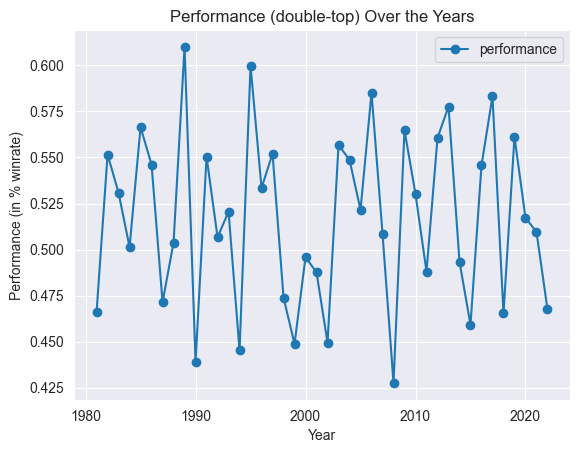

In [4]:
import matplotlib.pyplot as plt

# Plot the performance column against the year column
df_pruned.plot(y='performance', marker='o')

# Set labels and title
plt.xlabel('Year')
plt.ylabel('Performance (in % winrate)')
plt.title(f'Performance ({algorithm}) Over the Years')

# Show the plot
plt.show()

In [5]:
import numpy as np
from scipy import stats
years = np.array(df_pruned.index)
values = np.array(df_pruned["performance"].values)

slope, intercept, r_value, p_value, std_err = stats.linregress(years, values)

print("Double Bottom YoY")
print(f"Slope: {slope:.4f}")
print(f"Intercept: {intercept:.4f}")
print(f"R-value (correlation coefficient): {r_value:.4f}")
print(f"P-value: {p_value:.4f}")
print(f"Standard error: {std_err:.4f}")

Double Bottom YoY
Slope: -0.0000
Intercept: 0.5761
R-value (correlation coefficient): -0.0076
P-value: 0.9618
Standard error: 0.0006


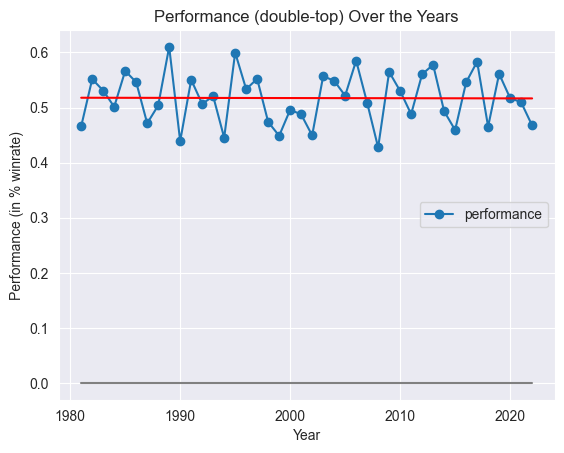

In [6]:
# Plot the DataFrame
df_pruned.plot(y='performance', marker='o')
plt.xlabel('Year')
plt.ylabel('Performance (in % winrate)')
plt.title(f'Performance ({algorithm}) Over the Years')

# Plot the regression line
regression_line = slope * years + intercept
plt.plot(years, regression_line, color='red')
plt.plot(years, 0*years, color='gray')
plt.savefig(f"./figures/yoy_perf_{algorithm}.svg", format="svg")

# Display the plot
plt.show()